prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [123]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy



Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

$ $

eq1: a =$\frac{v^2}{r}$ 

eq2: $F=ma$

eq3: $F_g = \frac{GMm}{r^2} $

combine eq1 & eq2: $F=m\frac{v^2}{r}$

substitute for $F_g$ in eq3: $m\frac{v^2}{r} = \frac{GMm}{r^2} $

divide both sides by $m$ and multiply by $r$: $v^2 = \frac{GM}{r} $

for relations of proportionality, constants such as $M$ and $G$ don't matter, which gives us:

$v^2\propto\frac{1}{r}$

## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [39]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv", sep=",")

In [40]:

m31.head()

,#M31,Grand,Rotation,Curve
0,#R(kpc,V(km/s),St.dev.,St.error
1,0.100,183.939,0.000,0.000
2,0.120,190.710,10.265,12.191
3,0.144,204.141,22.634,21.808
4,0.173,207.601,4.573,4.200


In [41]:
m31.describe()

,#M31,Grand,Rotation,Curve
count,56,56,56,56
unique,56,56,56,56
top,146.977,238.997,10.040,20.013
freq,1,1,1,1


In [103]:
m31Array = m31.to_numpy(dtype=None, copy=False)

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [49]:
kiloparsec = u.parsec/1000

In [60]:
distanceM31 = (1.606 * (10**11)) * u.astronomical_unit
distanceM31 = distanceM31.to(u.kiloparsec) #unit conversion

apparentSizeM31 = 4.96 #deg

In [68]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.3f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.087 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [92]:
distanceM31uncertainty = (7.0 * (10**9)) * u.astronomical_unit
distanceM31uncertainty = distanceM31uncertainty.to(u.kiloparsec)

diameterM31 = 2 * distanceM31 * sin((m31angS.to(u.rad)) / 2)
diameterM31uncertainty = 2 * (distanceM31 + distanceM31uncertainty) * sin((m31angS.to(u.rad)) / 2) - diameterM31

In [95]:
print("distance to  Andromeda:  {:.1f}".format(distanceM31))
print("Uncertainty in Andromeda's distance:  {:.0f}\n".format(distanceM31uncertainty))
print("Size of the visible component of Andromeda:  {:.1f}".format(diameterM31))
print("Uncertainty in Andromeda's visible diameter:  {:.1f}\n".format(diameterM31uncertainty))
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS))

distance to  Andromeda:  778.6 kpc
Uncertainty in Andromeda's distance:  34 kpc

Size of the visible component of Andromeda:  67.4 kpc
Uncertainty in Andromeda's visible diameter:  2.9 kpc

Angular Size of the visible component of Andromeda: 4.96 deg


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

remember that ($v^2\propto\frac{1}{r}$) and that the The ```dv``` uncertainty is the propagation of the uncertainty in the **location** of the HII line

In [119]:
#I am assuming that gal is the data value, and that it is the dataframe
#I also assumed that gsize is a diameter, and NOT a radius
def getradii(gal, gsize, n):
  dataArray = gal.to_numpy(dtype=None, copy=False)  #converts the dataframe to an array
  dataArray = dataArray[1:]
  
  #obtains the minimum radius that meets the criteria and the corrasponding V(km/s), St.dev., and St.error
  filteredArray = []
  #Finds set of elements where the radius is greater than or equal to n times the visible galactic radius
  for i in dataArray:
    if float(i[0]) >= (gsize/2 * n):
      filteredArray.append(i)
  #Finds smallest value of R from the new, filtered set of elements
  minRadius = filteredArray[0][0];
  minRadElement = filteredArray[0]
  for i in filteredArray:
    if float(i[0]<minRadius):
      minRadius = i[0]
      minRadElement = i
  
  # minRadElement[3] is standard deviation, which applies to the location/radius of the HII line
  radUncertainty = minRadElement[2]

  # apply the inverse relation stated in the above text to find the velocity uncertainty
  velUncertainty = (np.sqrt(radUncertainty))**-1

  return [minRadius, radUncertainty, minRadElement[1], velUncertainty]
  

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

In [121]:
m31

,#M31,Grand,Rotation,Curve
0,#R(kpc,V(km/s),St.dev.,St.error
1,0.100,183.939,0.000,0.000
2,0.120,190.710,10.265,12.191
3,0.144,204.141,22.634,21.808
4,0.173,207.601,4.573,4.200
5,0.207,210.188,3.943,3.258
6,0.249,213.512,4.218,3.190
7,0.299,217.208,3.813,2.623
8,0.358,219.673,2.181,1.371
9,0.430,219.357,2.193,1.259


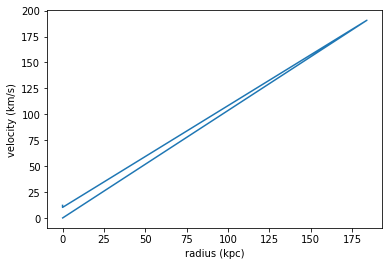

In [178]:
def plotGal(gal):
  gArray = gal.to_numpy(dtype=None, copy=False)
  gArray = gArray[1:]
  gArray = gArray.astype(float)

  data = {
      'radius (kpc)': gArray[:][0],
      'velocity (km/s)': gArray[:][1]
  }
  df = pd.DataFrame(data,columns=['radius (kpc)','velocity (km/s)'])
  x=df.iloc[:,0]
  y=df.iloc[:,1]
  plt.xlabel('radius (kpc)')
  plt.ylabel('velocity (km/s)')
  plt.plot(x,y)
  pl.show()
plotGal(m31)#, m31Rds

#I dont know what I did wrong :(

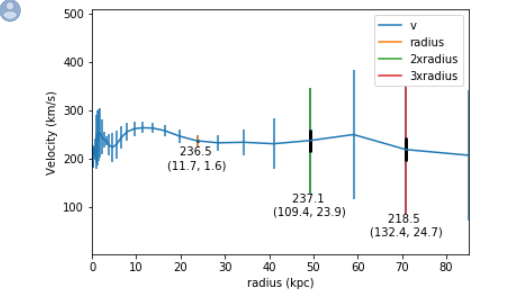

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v^2\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v^2 \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

In [ ]:
def vratios(gal, rds, rd, err='dv'):
      ...

In [ ]:
# your code here

### Discuss!

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [ ]:
# your code here